In [22]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from dlp.dataset import Dataset
from parksim.trajectory_predict.data_processing.utils import TransformerDataProcessor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# Load dataset
ds = Dataset()

home_path = str(Path.home()) + '/MPCLab'
ds.load(home_path + '/dlp-dataset/data/DJI_0012')

In [24]:
scene = ds.get('scene', ds.list_scenes()[0])
frame = ds.get_future_frames(scene['first_frame'],timesteps=300)[80]
all_instance_tokens = frame['instances']
#all_instance_tokens

In [25]:
all_frames = []
frame_token = scene['first_frame']
while frame_token:
    all_frames.append(frame_token)
    frame = ds.get('frame', frame_token)
    frame_token = frame['next']
len(all_frames)

11301

In [26]:
ds.get('scene', ds.list_scenes()[0])

{'scene_token': '66045def24565e370dff814aa01e8ffed07318b9',
 'filename': 'DJI_0012',
 'timestamp': '2020-08-08 10:08:03',
 'first_frame': '840d7356e46973280c5e71d628fc3b240bfd040a',
 'last_frame': '989b3f56582cdc1af8b1a5a51693bd83327851c9',
 'agents': ['a1b3619e3bc68c3de29af54ba9ff3de96c7de3dc',
  '44bcb749f3901204f4aba6e35615f5e026d7c4cc',
  '961c7ae677f816c35c7b1fc4eed6ff57735cd8a2',
  'ca0c3dce6f63c54c628f69579fdeb0b35c3574b3',
  'b737b285b16639d88bf1c31d05e77ad8f469faa4',
  'ef0a913c3e13777fadd656b22356d7a9d07fc5fd',
  '4dbcdf8732d527e19b2a5d48c238afac7e1c8276',
  'cf6b2d0a13cf2c7c957e698876f3631a1568e288',
  '3d268470233f41fda2590bf806809ec8b56911c0',
  '6458199fb85cccc9725285b59d0d62db70a4d7c1',
  '15dced130fd87b366a213fc3c4128dd8dd57f212',
  'e9c0d3af6541cc4b145966155b7be04e303e6c1f',
  '1b5cf3891abd3f3ff9b5f700815c18482356069f',
  '6e88e73bec8ff10705b244cfdc8f30f05df1b61a',
  '15a9eda80ab9365ad382a8cffb70ca89dd23f49a',
  'c55f10a20fb268ccb6d55b685e3145049bb3a844',
  'b659cc2494

In [27]:
extractor = TransformerDataProcessor(ds = ds)

/home/nidhi/MPCLab/dlp-dataset/dlp/visualizer.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([[idx+1, area, *points[r][c], *points[r][c+1], *points[r+1][c+1], *points[r+1][c]]])
/home/nidhi/MPCLab/dlp-dataset/dlp/visualizer.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([[idx+1, area, *points[r][c], *points[r][c+1], *points[r+1][c+1], *points[r+1][c]]])
/home/nidhi/MPCLab/dlp-dataset/dlp/visualizer.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([[idx+1, area, *points[r][c], *points[r][c+1], *points[r+1][c+1], *points[r+1][c]]])
/home/nidhi/MPCLab/dlp-dataset/dlp/visualizer.py:81: FutureWarning: The frame.append method is deprecated and will be removed from panda

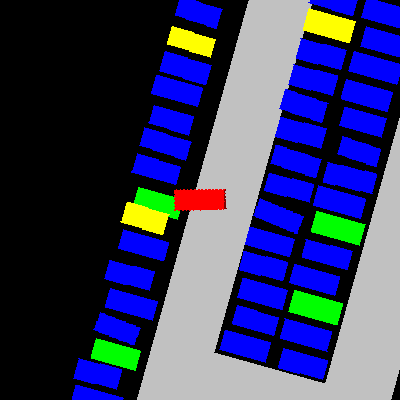

In [28]:
scene = ds.get('scene', ds.list_scenes()[0])
frame = ds.get_future_frames(scene['first_frame'],timesteps=300)[80]
inst_token = frame['instances'][1]

instance = ds.get('instance', inst_token)
current_state = np.array([instance['coords'][0], instance['coords'][1], instance['heading'], instance['speed']])

img_frame = extractor.vis.plot_frame(frame['frame_token'])
img = extractor.vis.inst_centric(img_frame, inst_token)
display(img)

In [29]:
instances, instance_indices = extractor.filter_instances(frame['frame_token'], 20, 4, 4)
print(instances)
for instance_token in instances:
    print(instance_token)
    print(extractor.get_instance_index(instance_token, ds.get('instance', instance_token)['agent_token']))

['1612b6c1683bcf6c078d706ee6d8baa001749420', '1b5f752946a227d7b93d55744c6f79c7ffc2b47f', 'b43bca4fa3c0fe24a378c8f4c56fc6c184afd14e', 'f994048d42d33d639fdc71de3abd2bc98db4b925', '4960b7dd7c152388a085f44b47d78e316848d7c9']
1612b6c1683bcf6c078d706ee6d8baa001749420
(80, 11300)
1b5f752946a227d7b93d55744c6f79c7ffc2b47f
(80, 11300)
b43bca4fa3c0fe24a378c8f4c56fc6c184afd14e
(80, 11300)
f994048d42d33d639fdc71de3abd2bc98db4b925
(80, 6355)
4960b7dd7c152388a085f44b47d78e316848d7c9
(80, 11300)


In [30]:
ds.get('instance', instance_token)

{'instance_token': '4960b7dd7c152388a085f44b47d78e316848d7c9',
 'agent_token': '4dbcdf8732d527e19b2a5d48c238afac7e1c8276',
 'frame_token': '5223cc00ecfe691f6430bd56d691c50488772ee2',
 'coords': [3.1899999999441206, 15.129999999888241],
 'heading': -1.619592653589793,
 'speed': 1.52,
 'acceleration': [-0.348, 0.0878],
 'mode': 'incoming',
 'prev': 'ac90d1a58cccb6972a8cde588f6cc9b282ae1e5a',
 'next': '43d8e2ad10a8b743fc1f30803c1c777c6e71e914'}

In [50]:
from parksim.trajectory_predict.data_processing.create_dataset import get_data_for_instance
img, past, future = get_data_for_instance(instances[1], 80, frame['frame_token'], extractor, ds)
print(past)
print(future)

[[ 1.67970447 -0.28825836 -0.115     ]
 [ 0.84544278 -0.12699017 -0.0598    ]
 [ 0.          0.          0.        ]]
[[-0.83891352  0.06651398  0.056     ]
 [-1.71789957  0.09067007  0.109     ]
 [-2.54914114  0.05549265  0.1607    ]]


[1.67970447 0.84544278 0.        ]
[-0.28825836 -0.12699017  0.        ]
[-0.83891352 -1.71789957 -2.54914114]
[0.06651398 0.09067007 0.05549265]
[62.410000000032596, 67.27000000001863]


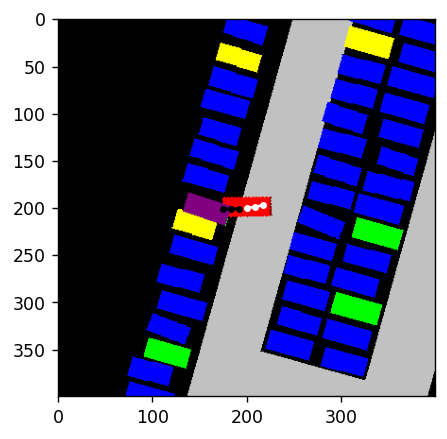

In [51]:
img_fr = extractor.vis.plot_frame(frame['frame_token'])
im = extractor.vis.inst_centric(img_fr, instances[1])
im = extractor.label_target_spot(instances[1], im)
print(past[:,0])
print(past[:,1])
print(future[:,0])
print(future[:,1])
print(ds.get('instance', instances[1])['coords'])
# I'm unsure how to plot the past/future because of the scaling of pixels to distance, plus the top left is 0,0 instead of the center
plt.plot(10*past[:,0]+200, 10*past[:,1]+200, marker='.', color='white')
plt.plot(10*future[:,0]+200, 10*future[:,1]+200, marker='.', color='black')
plt.imshow(im)
plt.show()

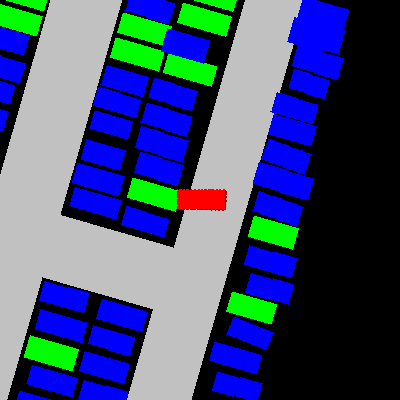

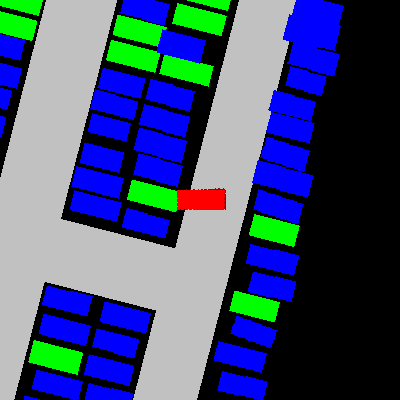

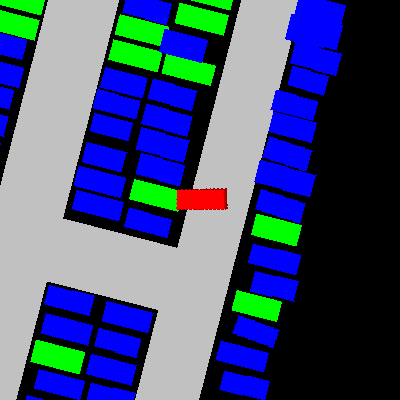

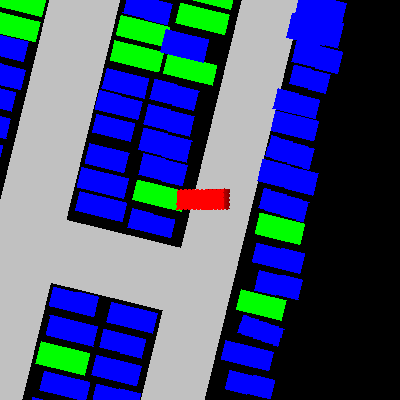

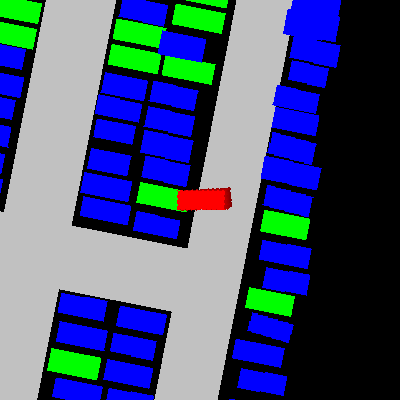

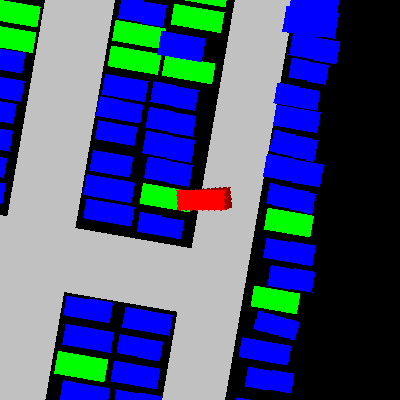

In [58]:
indices = [30, 55, 80, 105, 130, 155]
curr_inst = ds.get('instance', instances[0])
all_instances = ds.get_agent_instances(curr_inst['agent_token'])
for i in indices:
    fr = ds.get_future_frames(scene['first_frame'],timesteps=300)[i]
    img_fr = extractor.vis.plot_frame(fr['frame_token'])
    im = extractor.vis.inst_centric(img_fr, all_instances[i]['instance_token'])
    display(im)

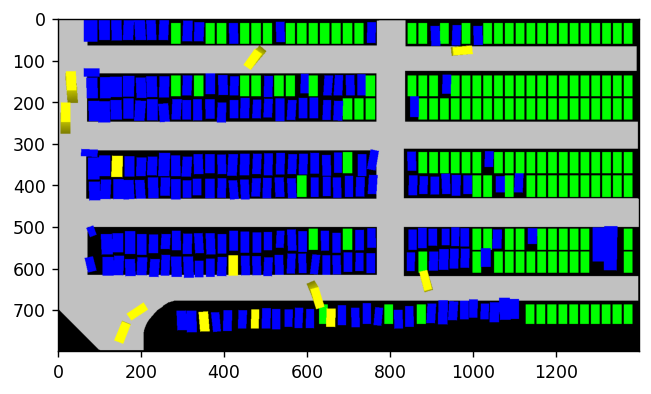

In [26]:
plt.imshow(np.array(img_frame))

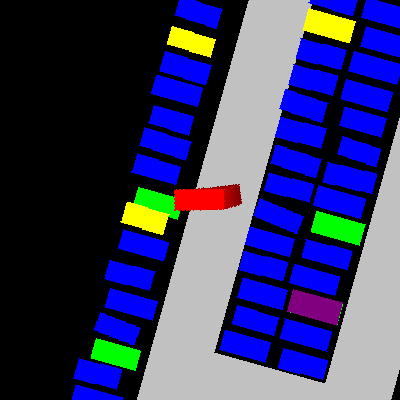

In [5]:

all_spots = extractor.get_parking_spots_from_instance(inst_token, frame)
spot_centers = extractor.detect_center(inst_token, 'spot')
#selected_spot_index = extractor.get_intent_label(inst_token, spot_centers)
labeled_img = extractor.label_spot(all_spots[1], inst_token, frame)
display(labeled_img)
